In [5]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Install forwardforward using pip install -e .
from forwardforward.networks.cnn import ReceptiveFieldNet
from forwardforward.datasets.supervised import create_mnist_datasets_supervised

In [6]:
weights_path = "../models/supervised_2023-06-24_16-54-37_5_8.45.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ReceptiveFieldNet(device).to(device)
model.load_weights_dict(torch.load(weights_path))

In [7]:
model.eval()

_, _, test = create_mnist_datasets_supervised("../data")
test_loader = DataLoader(
    test, batch_size=1, shuffle=True, num_workers=0
)

images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

Loading MNIST dataset...
Positive data already exists, skipping...
Negative data already exists, skipping...
torch.Size([1, 1, 28, 28])


In [8]:
model.forward_supervised(images)

tensor([5], device='cuda:0')

In [10]:
labels

tensor([7], device='cuda:0')

In [12]:
def _overlay_y_on_x_batch(images: torch.Tensor, label: int):
    """Create a positive sample by taking an image and replacing the first 10 pixels by a one of N representation of the label"""
    overlayed_images = images.clone()
    for i in range(images.shape[0]):
        overlayed_images[i, 0, 0, :10] = overlayed_images.min()
        overlayed_images[i, 0, 0, label] = overlayed_images.max()
    return overlayed_images

torch.Size([1, 1, 28, 28])


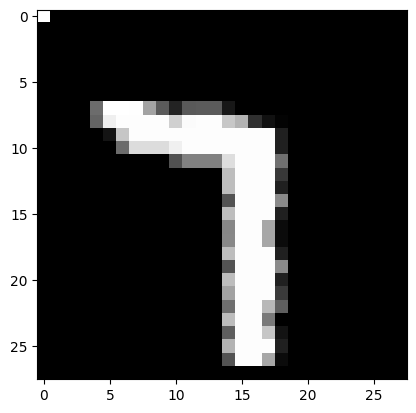

In [20]:
overlayed = _overlay_y_on_x_batch(images, 0)
print(overlayed.shape)

# Plot overlayed image
plt.imshow(overlayed[0, 0, :,:].cpu().numpy(), cmap="gray")

In [28]:
goodness_per_label = []
for label in range(10):
    h = _overlay_y_on_x_batch(images, label)
    layer_goodness = []
    for layer in model.layers:
        h = layer(h)  # [B, C, H, W]
        layer_goodness.append(
            torch.mean(torch.square(h), dim=(1, 2, 3))
        )  # [B]
        print(torch.mean(torch.square(h), dim=(1, 2, 3)))
    goodness_per_label.append(
        torch.sum(torch.stack(layer_goodness, dim=1), dim=1)
    )
argmax = torch.stack(goodness_per_label, dim=1).argmax(1)  # [B]

tensor([5.4330], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7699], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.7910], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([5.4393], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7739], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.7910], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([5.4331], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7724], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.7910], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([5.4305], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7763], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.7910], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([5.4276], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7747], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.7910], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([5.4379], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([3.7758], device='cuda:0', grad_fn=<MeanBackward1

In [23]:
argmax

tensor([5], device='cuda:0')